<a href="https://colab.research.google.com/github/LuisHVieira/tcc/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.3 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/TCC_LuisHenrique/
%rm /content/drive/MyDrive/TCC_LuisHenrique/bestWeightsVGG16.weights.best.hdf5
%rm /content/drive/MyDrive/TCC_LuisHenrique/bestWeightsVGG16_with_fine_tune.weights.best.hdf5

%rm /content/drive/MyDrive/TCC_LuisHenrique/bestWeightsRESNET50V2.weights.best.hdf5
%rm /content/drive/MyDrive/TCC_LuisHenrique/bestWeightsRESNET50V2_with_fine_tune.weights.best.hdf5

%rm /content/drive/MyDrive/TCC_LuisHenrique/bestWeightsMOBILENETV2.weights.best.hdf5
%rm /content/drive/MyDrive/TCC_LuisHenrique/bestWeightsMOBILENETV2_with_fine_tune.weights.best.hdf5

/content/drive/MyDrive/TCC_LuisHenrique
rm: cannot remove '/content/drive/MyDrive/TCC_LuisHenrique/bestWeightsVGG16.weights.best.hdf5': No such file or directory
rm: cannot remove '/content/drive/MyDrive/TCC_LuisHenrique/bestWeightsVGG16_with_fine_tune.weights.best.hdf5': No such file or directory
rm: cannot remove '/content/drive/MyDrive/TCC_LuisHenrique/bestWeightsRESNET50V2.weights.best.hdf5': No such file or directory
rm: cannot remove '/content/drive/MyDrive/TCC_LuisHenrique/bestWeightsRESNET50V2_with_fine_tune.weights.best.hdf5': No such file or directory
rm: cannot remove '/content/drive/MyDrive/TCC_LuisHenrique/bestWeightsMOBILENETV2.weights.best.hdf5': No such file or directory
rm: cannot remove '/content/drive/MyDrive/TCC_LuisHenrique/bestWeightsMOBILENETV2_with_fine_tune.weights.best.hdf5': No such file or directory


In [ ]:
import import_ipynb
from modelBuilder import Architecture, Datas, Builder, Evaluator

In [ ]:
batch_size = 32
# batch_size = 16

paths_dataset = [
          '/content/drive/MyDrive/datasets/leaf/symptom/train/',
         '/content/drive/MyDrive/datasets/leaf/symptom/val/',
        '/content/drive/MyDrive/datasets/leaf/symptom/test/',
]

vgg16 = Architecture.VGG16
resnet50v2 = Architecture.RESNET50V2
mobilenetv2 = Architecture.MOBILENETV2

n_epochs = 100
fine_tune_mobilenet = 3
fine_tune_resnet = 53
fine_tune_vgg = 2

In [ ]:
datas = Datas(batch_size = batch_size)
datas.data_augumentation()
datas.load_dataSet(paths_dataset)

Found 1539 images belonging to 5 classes.
Found 335 images belonging to 5 classes.
Found 335 images belonging to 5 classes.


In [ ]:
mobilenet = Builder(datas, mobilenetv2, n_epochs = n_epochs)
mobilenet_fine_tune = Builder(datas, mobilenetv2, n_epochs = n_epochs, fine_tune=fine_tune_mobilenet)

resnet = Builder(datas, resnet50v2, n_epochs = n_epochs)
resnet_fine_tune = Builder(datas, resnet50v2, n_epochs = n_epochs, fine_tune=fine_tune_resnet)

vgg = Builder(datas, vgg16, n_epochs = n_epochs)
vgg_fine_tune = Builder(datas, vgg16, n_epochs = n_epochs, fine_tune=fine_tune_vgg)

In [ ]:
model_mobilenet = mobilenet.create_model()
model_mobilenet_fine_tune = mobilenet_fine_tune.create_model()

model_resnet = resnet.create_model()
model_resnet_fine_tune = resnet_fine_tune.create_model()

model_vgg = vgg.create_model()
model_vgg_fine_tune = vgg_fine_tune.create_model()

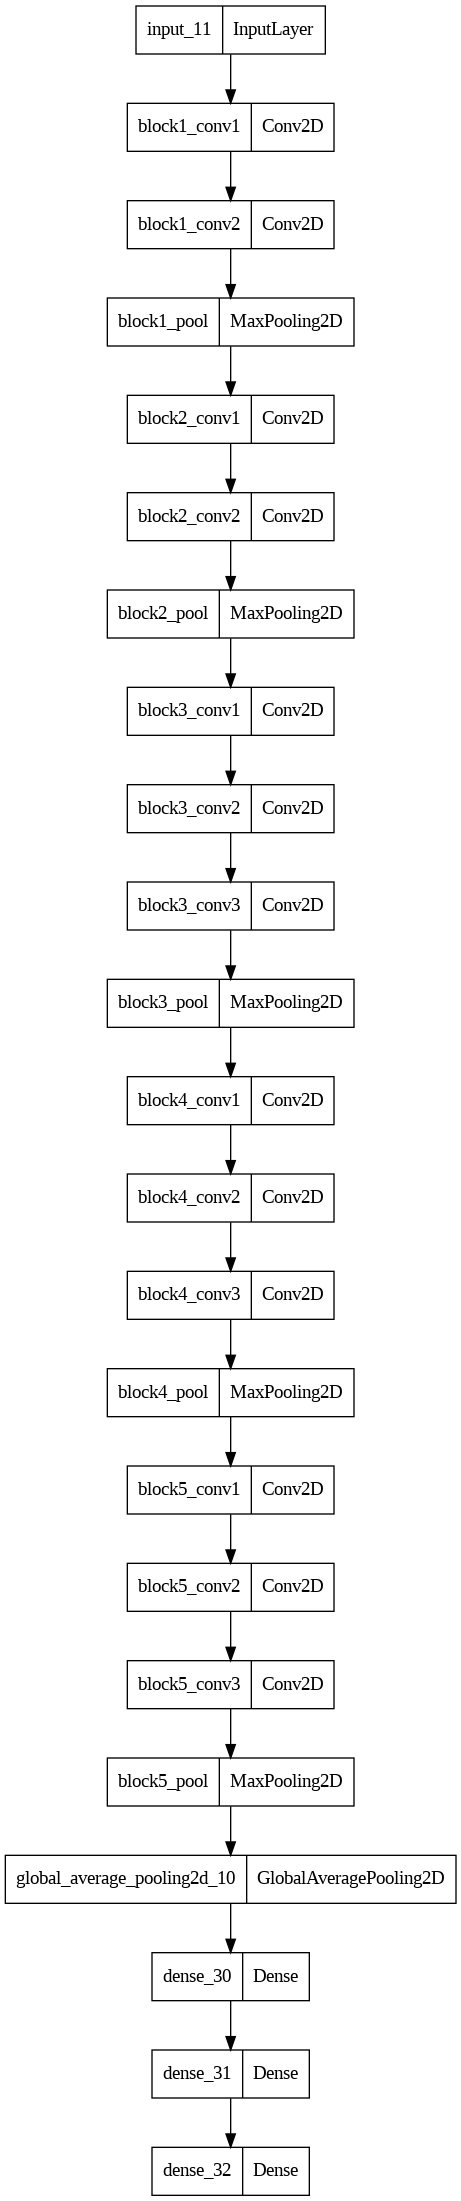

In [ ]:
import tensorflow as tf


tf.keras.utils.plot_model(
    vgg.model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)


In [ ]:
mobilenet.summary_model()
mobilenet_fine_tune.summary_model()

resnet.summary_model()
resnet_fine_tune.summary_model()

vgg.summary_model()
vgg_fine_tune.summary_model()

Model: "MOBILENETV2"
_____________________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     Trainable  
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               Y          
                                )]                                                                           
                                                                                                             
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                Y          
                                )                                                                            
                                                                                                             
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  Y

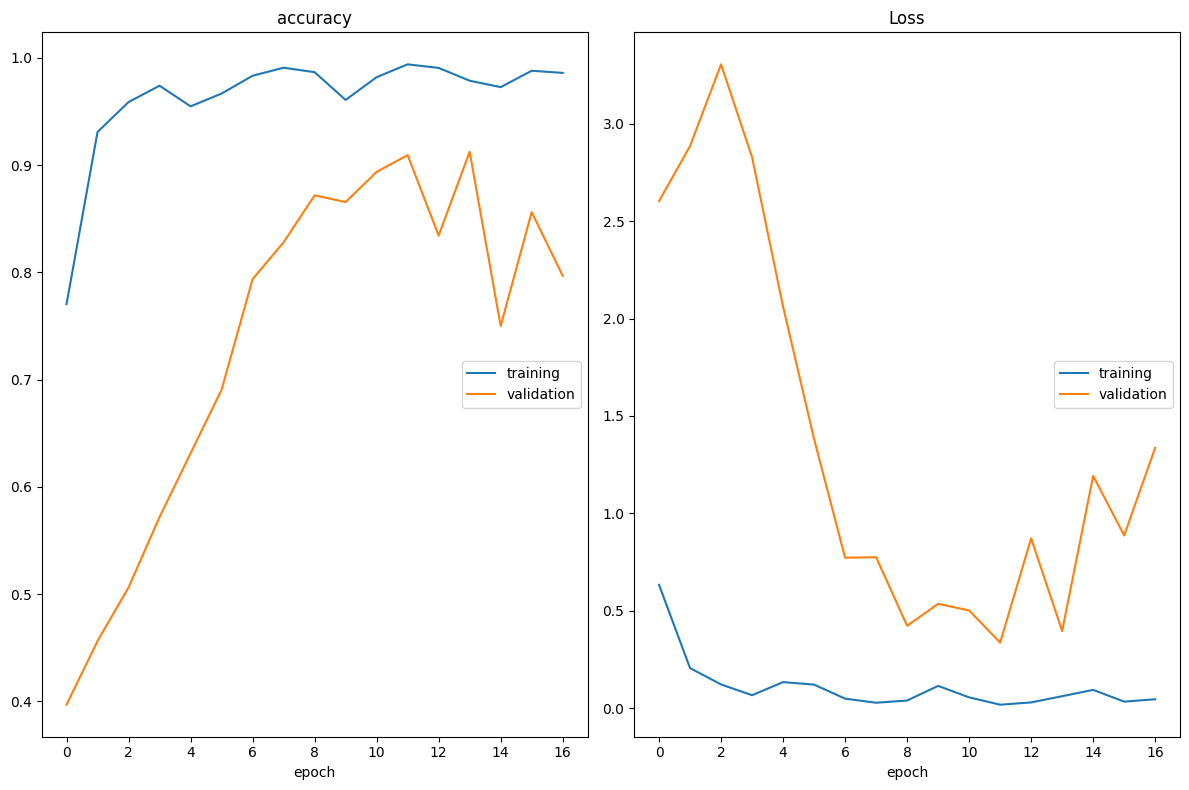

accuracy
	training         	 (min:    0.770, max:    0.994, cur:    0.986)
	validation       	 (min:    0.397, max:    0.913, cur:    0.797)
Loss
	training         	 (min:    0.017, max:    0.633, cur:    0.045)
	validation       	 (min:    0.336, max:    3.305, cur:    1.337)

Epoch 17: val_loss did not improve from 0.33611
48/48 [==============================] - 28s 594ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 1.3365 - val_accuracy: 0.7969


In [ ]:
mobilenet.fit_model()

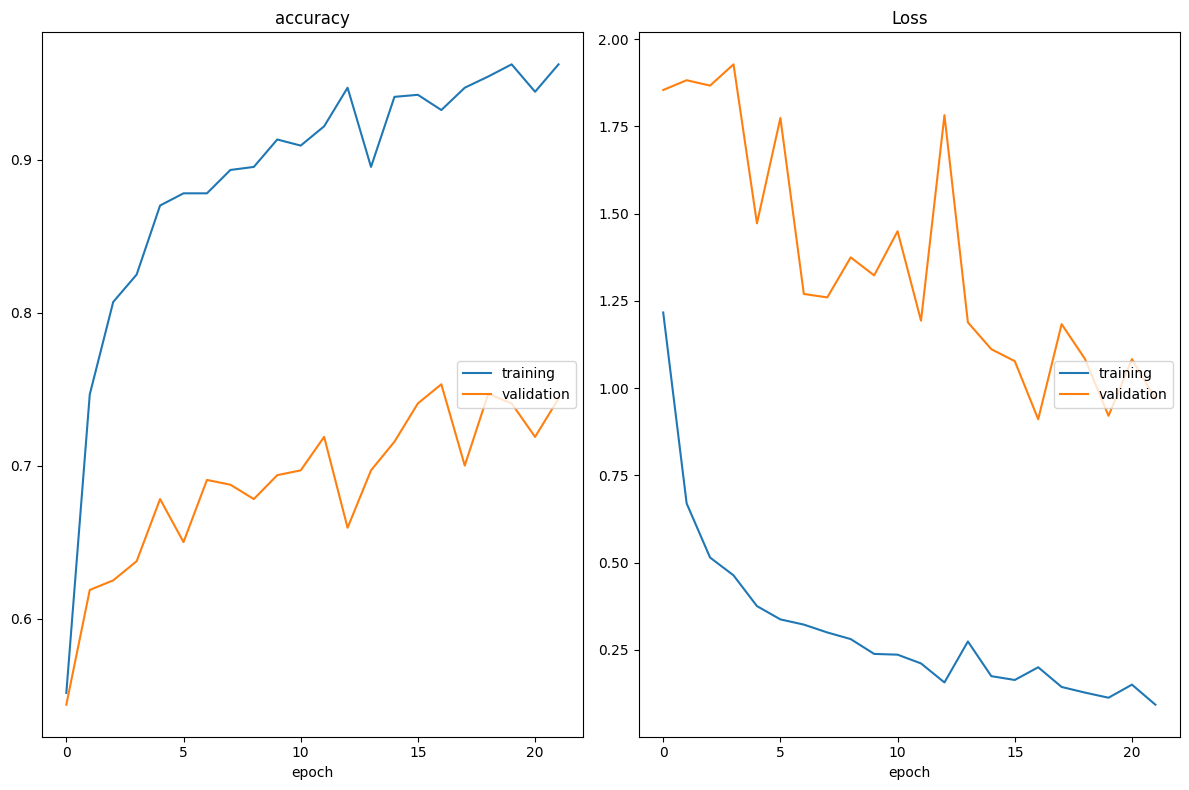

accuracy
	training         	 (min:    0.551, max:    0.962, cur:    0.962)
	validation       	 (min:    0.544, max:    0.753, cur:    0.744)
Loss
	training         	 (min:    0.093, max:    1.217, cur:    0.093)
	validation       	 (min:    0.911, max:    1.928, cur:    0.970)

Epoch 22: val_loss did not improve from 0.91107
48/48 [==============================] - 27s 568ms/step - loss: 0.0929 - accuracy: 0.9622 - val_loss: 0.9698 - val_accuracy: 0.7437


In [ ]:
mobilenet_fine_tune.fit_model()

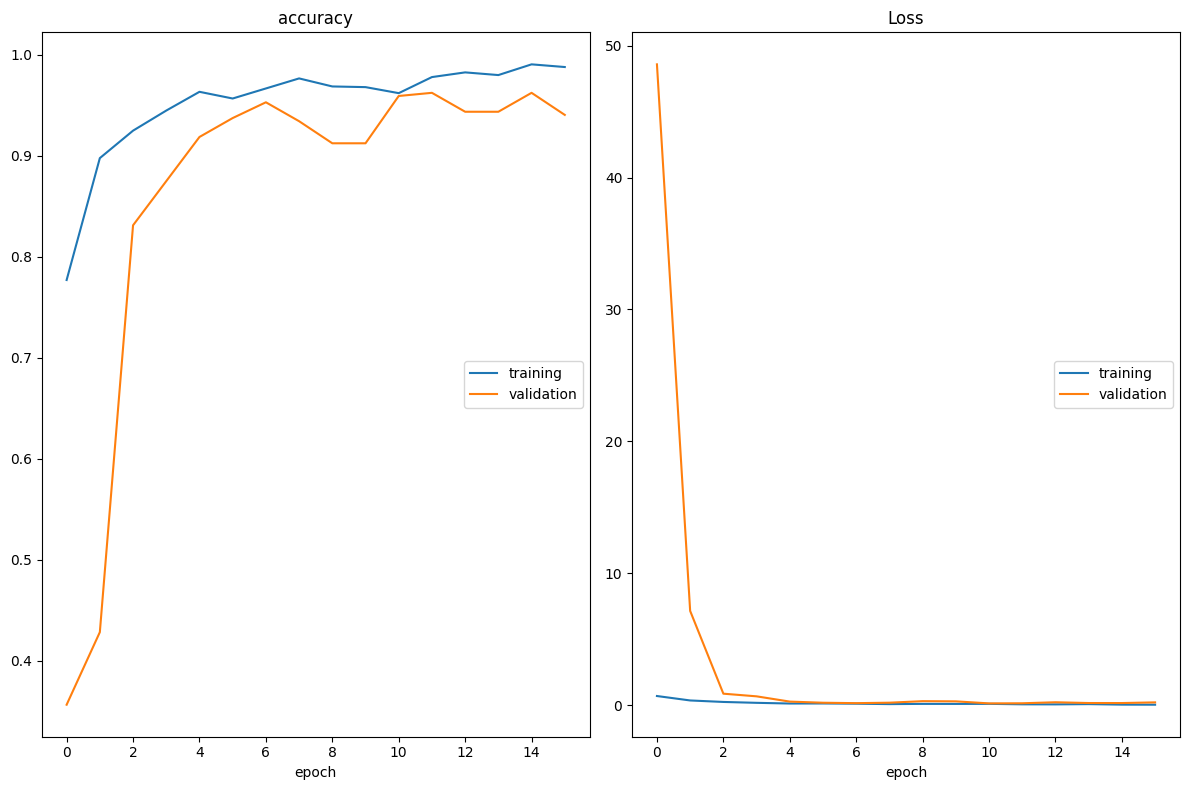

accuracy
	training         	 (min:    0.777, max:    0.991, cur:    0.988)
	validation       	 (min:    0.356, max:    0.962, cur:    0.941)
Loss
	training         	 (min:    0.031, max:    0.689, cur:    0.031)
	validation       	 (min:    0.130, max:   48.586, cur:    0.207)

Epoch 16: val_loss did not improve from 0.12995
48/48 [==============================] - 35s 734ms/step - loss: 0.0306 - accuracy: 0.9881 - val_loss: 0.2073 - val_accuracy: 0.9406


In [ ]:
resnet.fit_model()

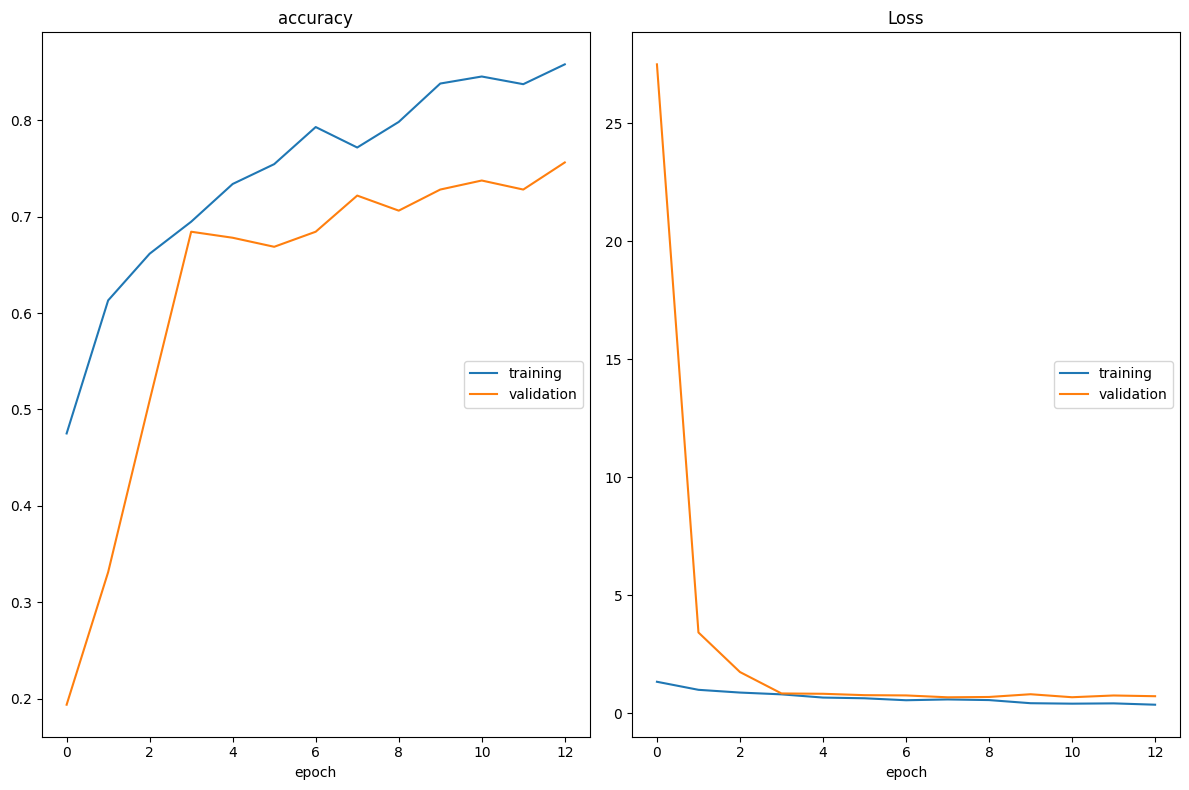

accuracy
	training         	 (min:    0.475, max:    0.858, cur:    0.858)
	validation       	 (min:    0.194, max:    0.756, cur:    0.756)
Loss
	training         	 (min:    0.360, max:    1.331, cur:    0.360)
	validation       	 (min:    0.674, max:   27.487, cur:    0.719)

Epoch 13: val_loss did not improve from 0.67353
48/48 [==============================] - 29s 596ms/step - loss: 0.3597 - accuracy: 0.8580 - val_loss: 0.7194 - val_accuracy: 0.7563


In [ ]:
resnet_fine_tune.fit_model()

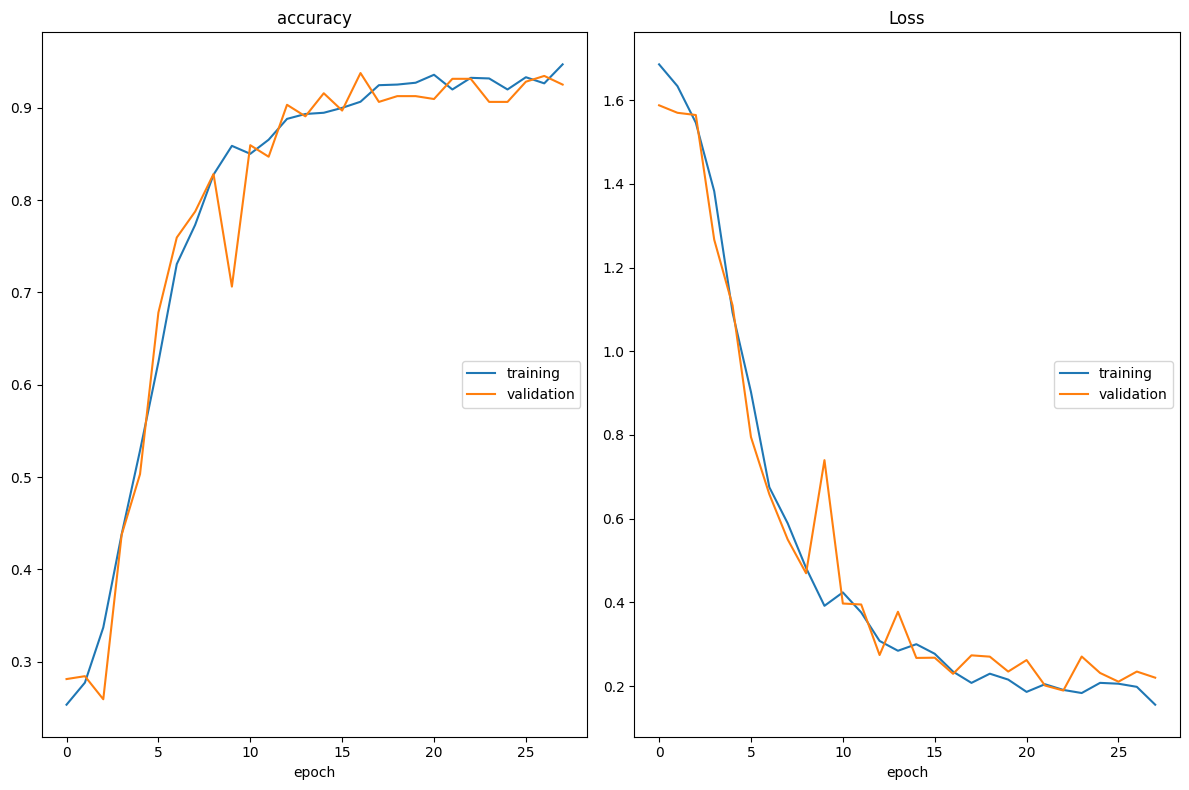

accuracy
	training         	 (min:    0.253, max:    0.947, cur:    0.947)
	validation       	 (min:    0.259, max:    0.938, cur:    0.925)
Loss
	training         	 (min:    0.156, max:    1.686, cur:    0.156)
	validation       	 (min:    0.189, max:    1.588, cur:    0.220)

Epoch 28: val_loss did not improve from 0.18940
48/48 [==============================] - 32s 668ms/step - loss: 0.1555 - accuracy: 0.9469 - val_loss: 0.2201 - val_accuracy: 0.9250


In [ ]:
vgg.fit_model()

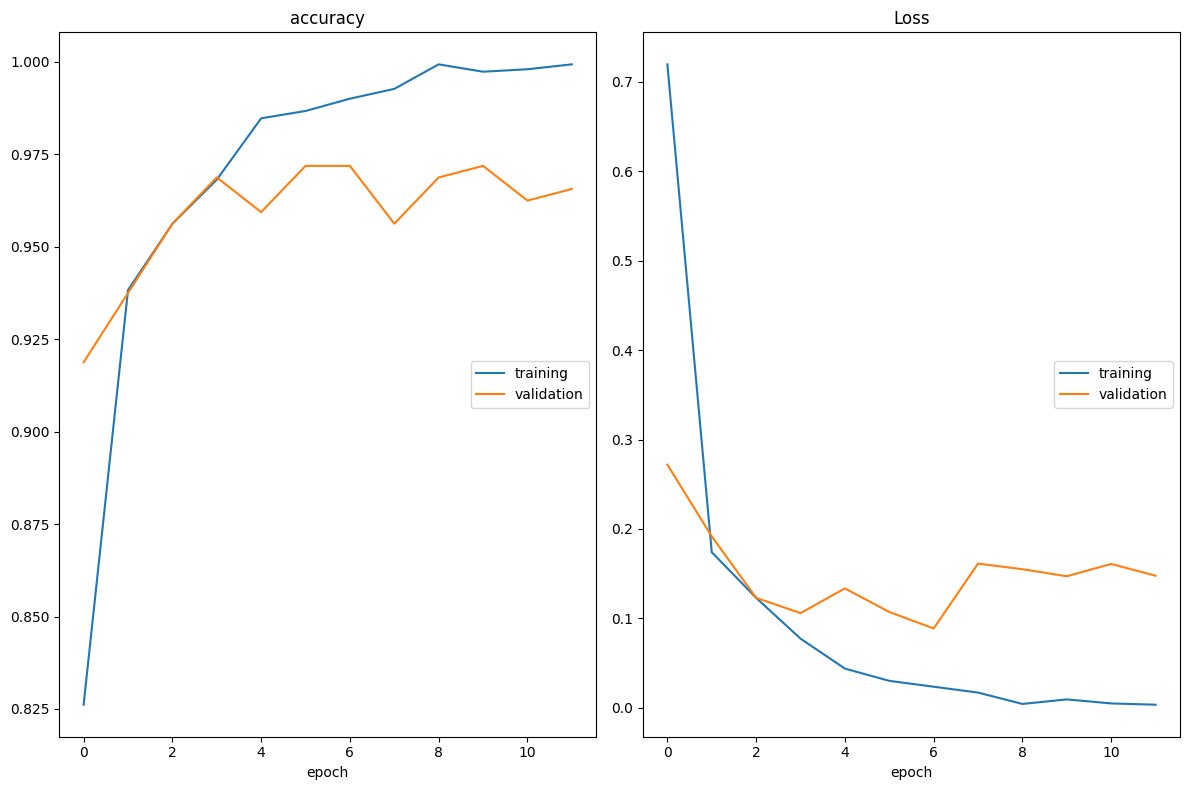

accuracy
	training         	 (min:    0.826, max:    0.999, cur:    0.999)
	validation       	 (min:    0.919, max:    0.972, cur:    0.966)
Loss
	training         	 (min:    0.003, max:    0.720, cur:    0.003)
	validation       	 (min:    0.089, max:    0.272, cur:    0.148)

Epoch 12: val_loss did not improve from 0.08877
48/48 [==============================] - 28s 583ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.1477 - val_accuracy: 0.9656


In [ ]:
vgg_fine_tune.fit_model()

Last Trainning and evaluate: 2023-04-04
Architecture: MOBILENETV2
Batch Size: 32
Learnning Rate: 9.999999747378752e-05
Fine Tune: unrealized (all layers)
Epochs covered / Epochs total: 17 / 100
Time Trainning: 0:31:27
335/335 [==============================] - 301s 897ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.96      0.81      0.88        83
           2       0.96      0.97      0.96        94
           3       0.76      0.96      0.85        69
           4       0.87      0.80      0.83        50

    accuracy                           0.90       335
   macro avg       0.91      0.90      0.90       335
weighted avg       0.91      0.90      0.90       335

Recall: 0.899
Precision: 0.908
Accuracy: 0.899
Loss 0.101


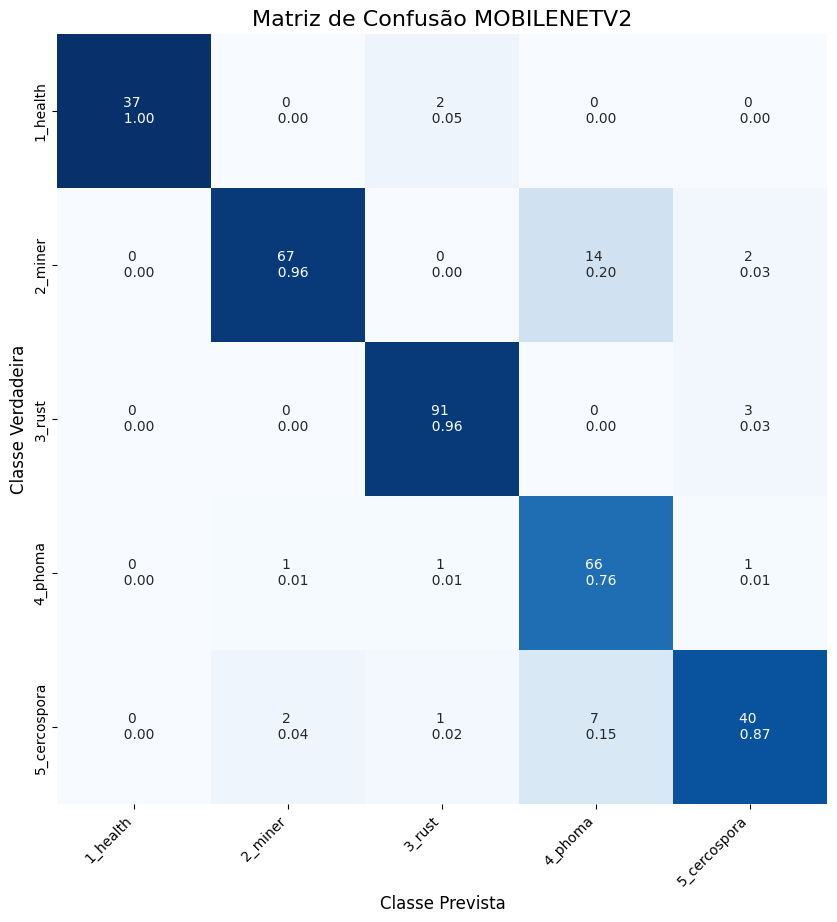

In [ ]:
evaluator = Evaluator(datas, mobilenet)


evaluator.about()
evaluator.report()
evaluator.metrics()
evaluator.confusion_matrix()



Last Trainning and evaluate: 2023-04-04
Architecture: MOBILENETV2
Batch Size: 32
Learnning Rate: 9.999999747378752e-05
Fine Tune: 3
Epochs covered / Epochs total: 22 / 100
Time Trainning: 0:13:2
335/335 [==============================] - 8s 21ms/step
              precision    recall  f1-score   support

           0       0.93      0.64      0.76        39
           1       0.72      0.83      0.77        83
           2       0.75      0.87      0.80        94
           3       0.83      0.93      0.88        69
           4       0.80      0.40      0.53        50

    accuracy                           0.78       335
   macro avg       0.80      0.73      0.75       335
weighted avg       0.79      0.78      0.76       335

Recall: 0.776
Precision: 0.786
Accuracy: 0.776
Loss 0.224


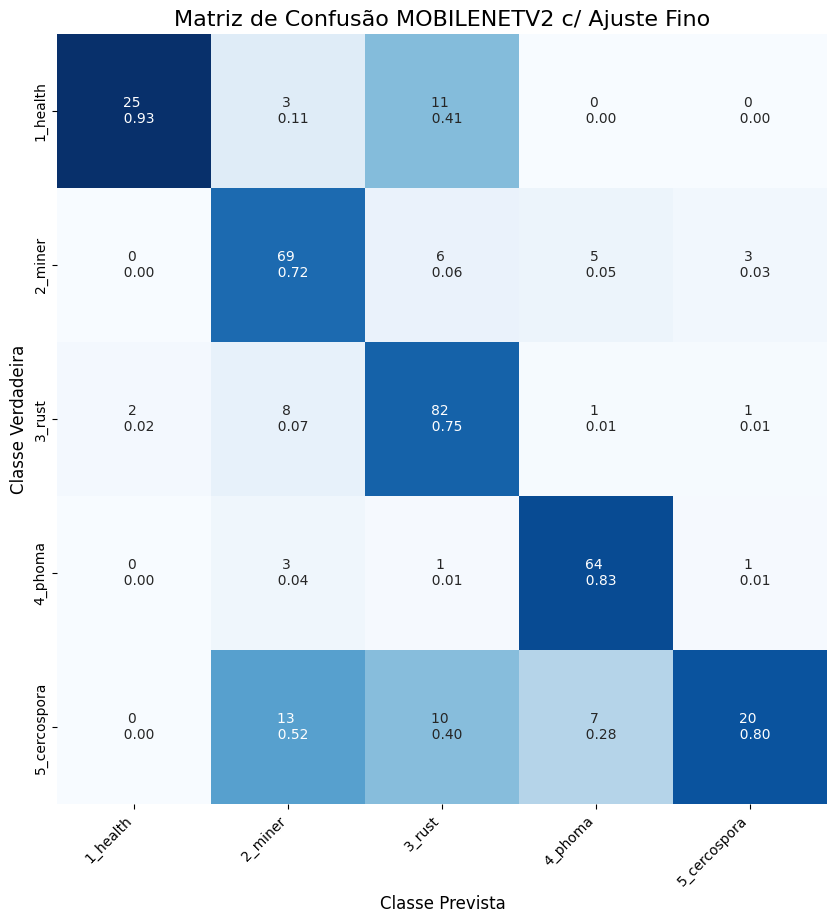

In [ ]:
evaluator = Evaluator(datas, mobilenet_fine_tune)


evaluator.about()
evaluator.report()
evaluator.metrics()
evaluator.confusion_matrix()

Last Trainning and evaluate: 2023-04-04
Architecture: RESNET50V2
Batch Size: 32
Learnning Rate: 9.999999747378752e-05
Fine Tune: unrealized (all layers)
Epochs covered / Epochs total: 16 / 100
Time Trainning: 0:9:54
335/335 [==============================] - 8s 19ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.92      0.94      0.93        83
           2       0.97      0.98      0.97        94
           3       0.94      0.97      0.96        69
           4       0.89      0.84      0.87        50

    accuracy                           0.94       335
   macro avg       0.94      0.94      0.94       335
weighted avg       0.94      0.94      0.94       335

Recall: 0.943
Precision: 0.943
Accuracy: 0.943
Loss 0.057


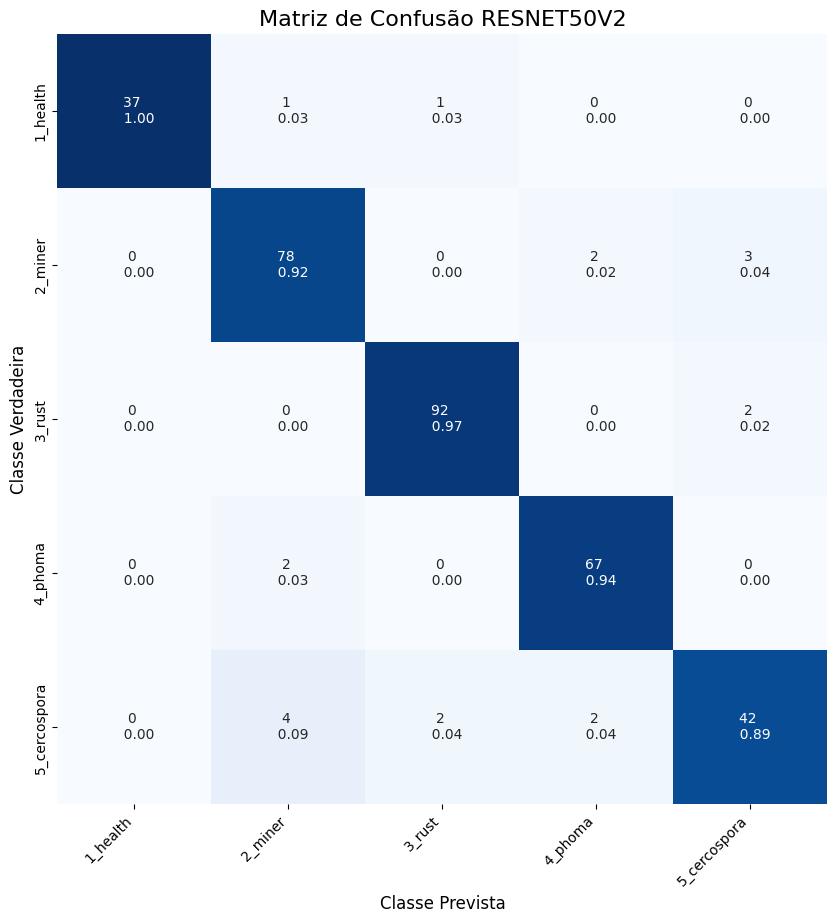

In [ ]:
evaluator = Evaluator(datas, resnet)

evaluator.about()
evaluator.report()
evaluator.metrics()
evaluator.confusion_matrix()



Last Trainning and evaluate: 2023-04-04
Architecture: RESNET50V2
Batch Size: 32
Learnning Rate: 9.999999747378752e-05
Fine Tune: 53
Epochs covered / Epochs total: 13 / 100
Time Trainning: 0:8:11
335/335 [==============================] - 6s 16ms/step
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        39
           1       0.61      0.72      0.66        83
           2       0.87      0.62      0.72        94
           3       0.83      0.86      0.84        69
           4       0.61      0.72      0.66        50

    accuracy                           0.73       335
   macro avg       0.74      0.74      0.73       335
weighted avg       0.75      0.73      0.73       335

Recall: 0.728
Precision: 0.747
Accuracy: 0.728
Loss 0.272


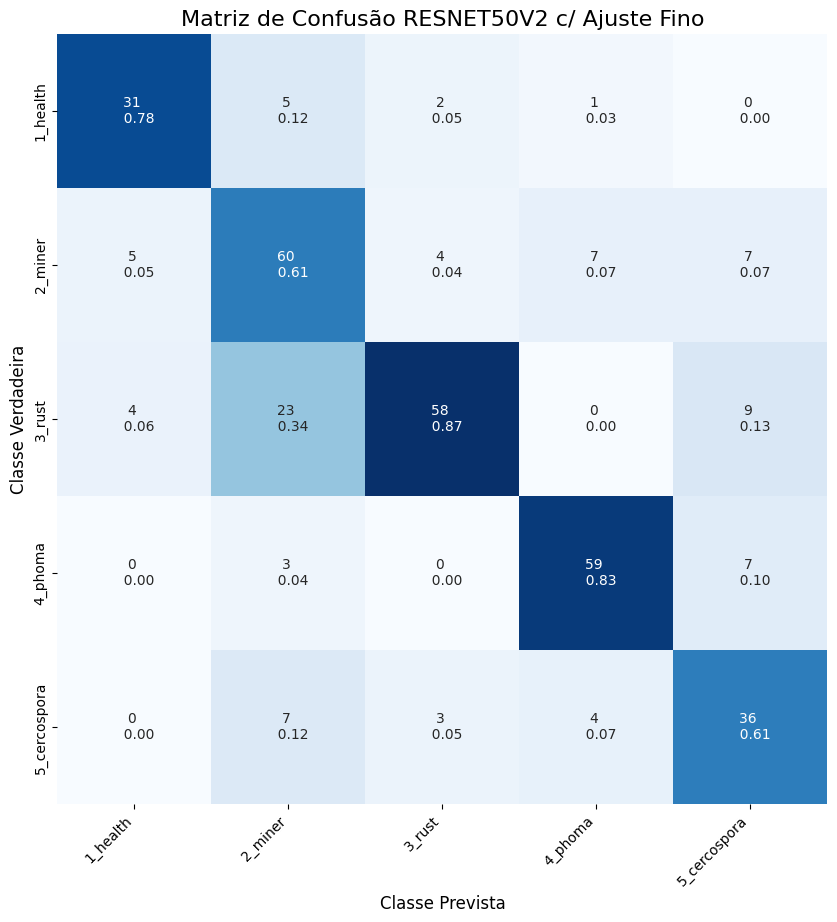

In [ ]:

evaluator = Evaluator(datas, resnet_fine_tune)


evaluator.about()
evaluator.report()
evaluator.metrics()
evaluator.confusion_matrix()

Last Trainning and evaluate: 2023-04-04
Architecture: VGG16
Batch Size: 32
Learnning Rate: 9.999999747378752e-05
Fine Tune: unrealized (all layers)
Epochs covered / Epochs total: 28 / 100
Time Trainning: 0:18:10
335/335 [==============================] - 6s 14ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.89      0.92      0.90        83
           2       0.99      0.96      0.97        94
           3       0.93      0.91      0.92        69
           4       0.77      0.80      0.78        50

    accuracy                           0.92       335
   macro avg       0.92      0.92      0.92       335
weighted avg       0.92      0.92      0.92       335

Recall: 0.919
Precision: 0.921
Accuracy: 0.919
Loss 0.081


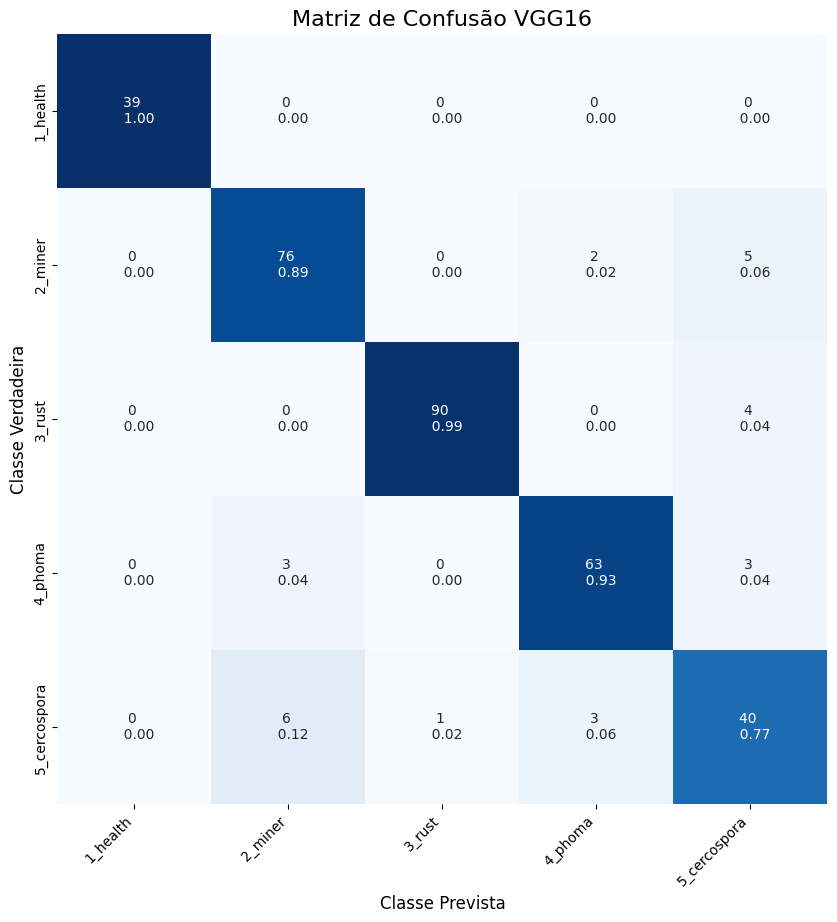

In [ ]:
evaluator = Evaluator(datas, vgg)


evaluator.about()
evaluator.report()
evaluator.metrics()
evaluator.confusion_matrix()





Last Trainning and evaluate: 2023-04-04
Architecture: VGG16
Batch Size: 32
Learnning Rate: 9.999999747378752e-05
Fine Tune: 2
Epochs covered / Epochs total: 12 / 100
Time Trainning: 0:7:17
335/335 [==============================] - 5s 15ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       0.91      0.90      0.91        83
           2       0.98      0.96      0.97        94
           3       0.83      0.93      0.88        69
           4       0.84      0.72      0.77        50

    accuracy                           0.91       335
   macro avg       0.90      0.90      0.90       335
weighted avg       0.91      0.91      0.91       335

Recall: 0.907
Precision: 0.908
Accuracy: 0.907
Loss 0.093


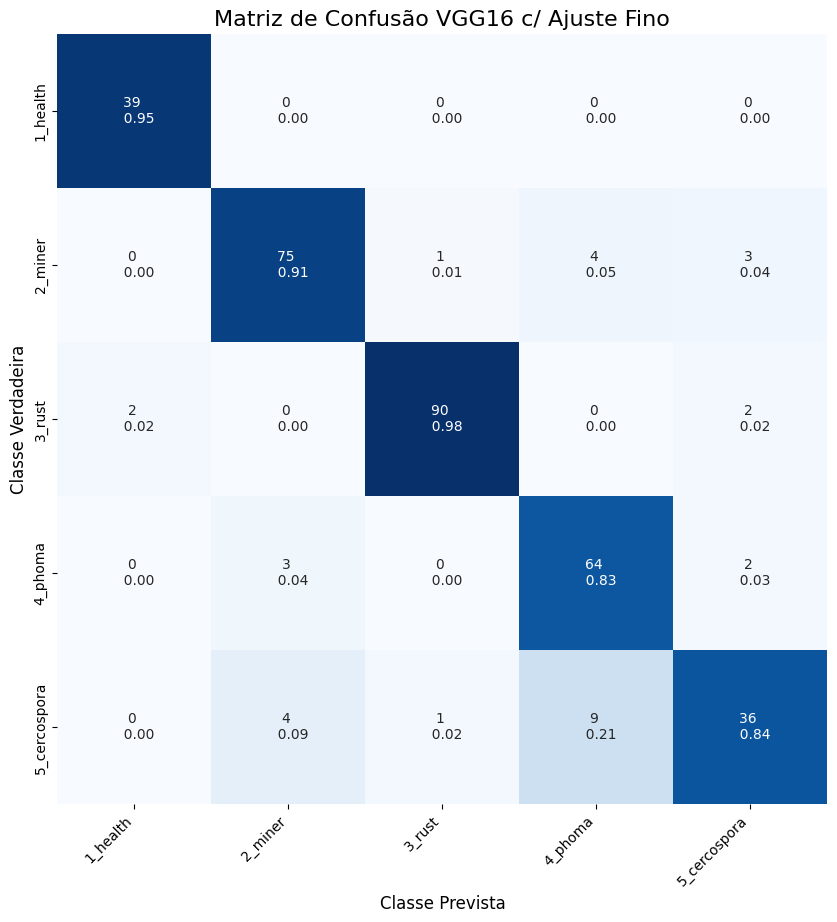

In [ ]:
evaluator = Evaluator(datas, vgg_fine_tune)


evaluator.about()
evaluator.report()
evaluator.metrics()
evaluator.confusion_matrix()